In [1]:
# connect drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Ai_intern/Task_2/yolov9


/content/drive/MyDrive/Ai_intern/Task_2/yolov9


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 14.38 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/drive/MyDrive/Ai_intern/Task_2/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
!wget -P /weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P /weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P /weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P /weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!python train_dual.py --workers 8 --batch 8 --img 640 --epochs 30 --data /content/drive/MyDrive/Ai_intern/Task_2/yolov9/data.yaml --weights /content/drive/MyDrive/Ai_intern/Task_2/yolov9/yolov9m.pt --device 0 --cfg /content/drive/MyDrive/Ai_intern/Task_2/yolov9/models/detect/yolov9_custom.yaml --hyp /content/drive/MyDrive/Ai_intern/Task_2/yolov9/data/hyps/hyp.scratch-high.yaml

2024-09-28 17:27:31.697967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 17:27:31.731530: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 17:27:31.741695: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-28 17:27:31.765971: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-28 17:27:33.504241: W tensorflow/comp

In [ ]:
# prompt: continue training from best.pt

!python train_dual.py --workers 8 --batch 8 --img 640 --epochs 50 --data /content/drive/MyDrive/Ai_intern/Task_2/yolov9/data.yaml --weights /content/drive/MyDrive/Ai_intern/Task_2/yolov9/runs/train/exp2/weights/best.pt --device 0 --cfg /content/drive/MyDrive/Ai_intern/Task_2/yolov9/models/detect/yolov9_custom.yaml --hyp /content/drive/MyDrive/Ai_intern/Task_2/yolov9/data/hyps/hyp.scratch-high.yaml


2024-09-28 18:55:03.859514: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 18:55:03.880549: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 18:55:03.886861: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-28 18:55:03.902131: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-28 18:55:05.310255: W tensorflow/comp

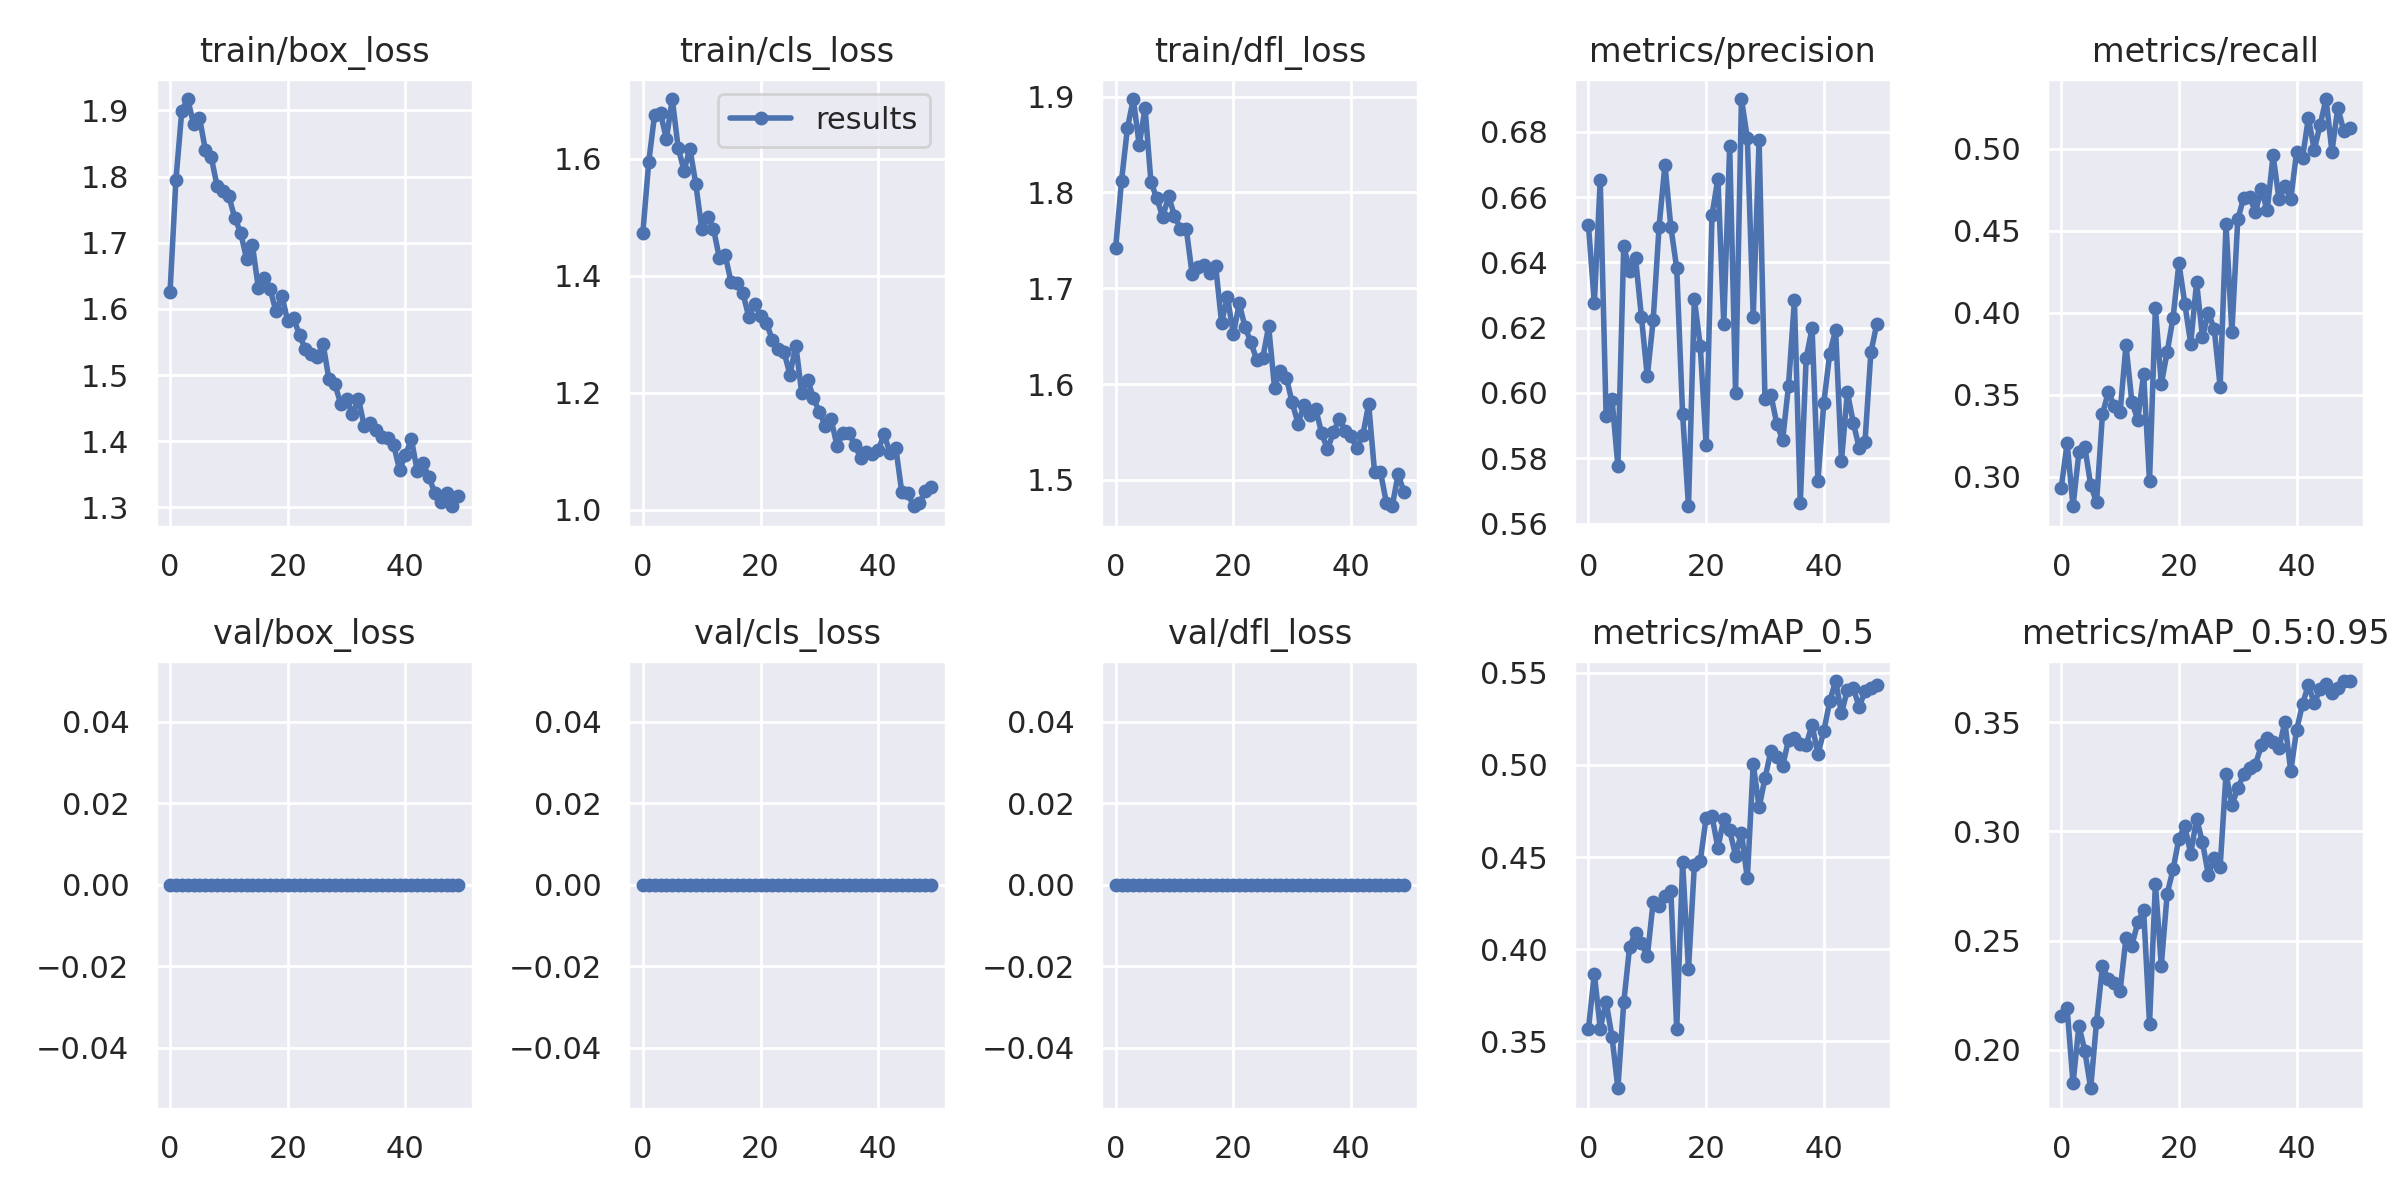

In [ ]:
from IPython.display import Image

Image(filename="/content/drive/MyDrive/Ai_intern/Task_2/yolov9/runs/train/exp/results.png", width=1000)

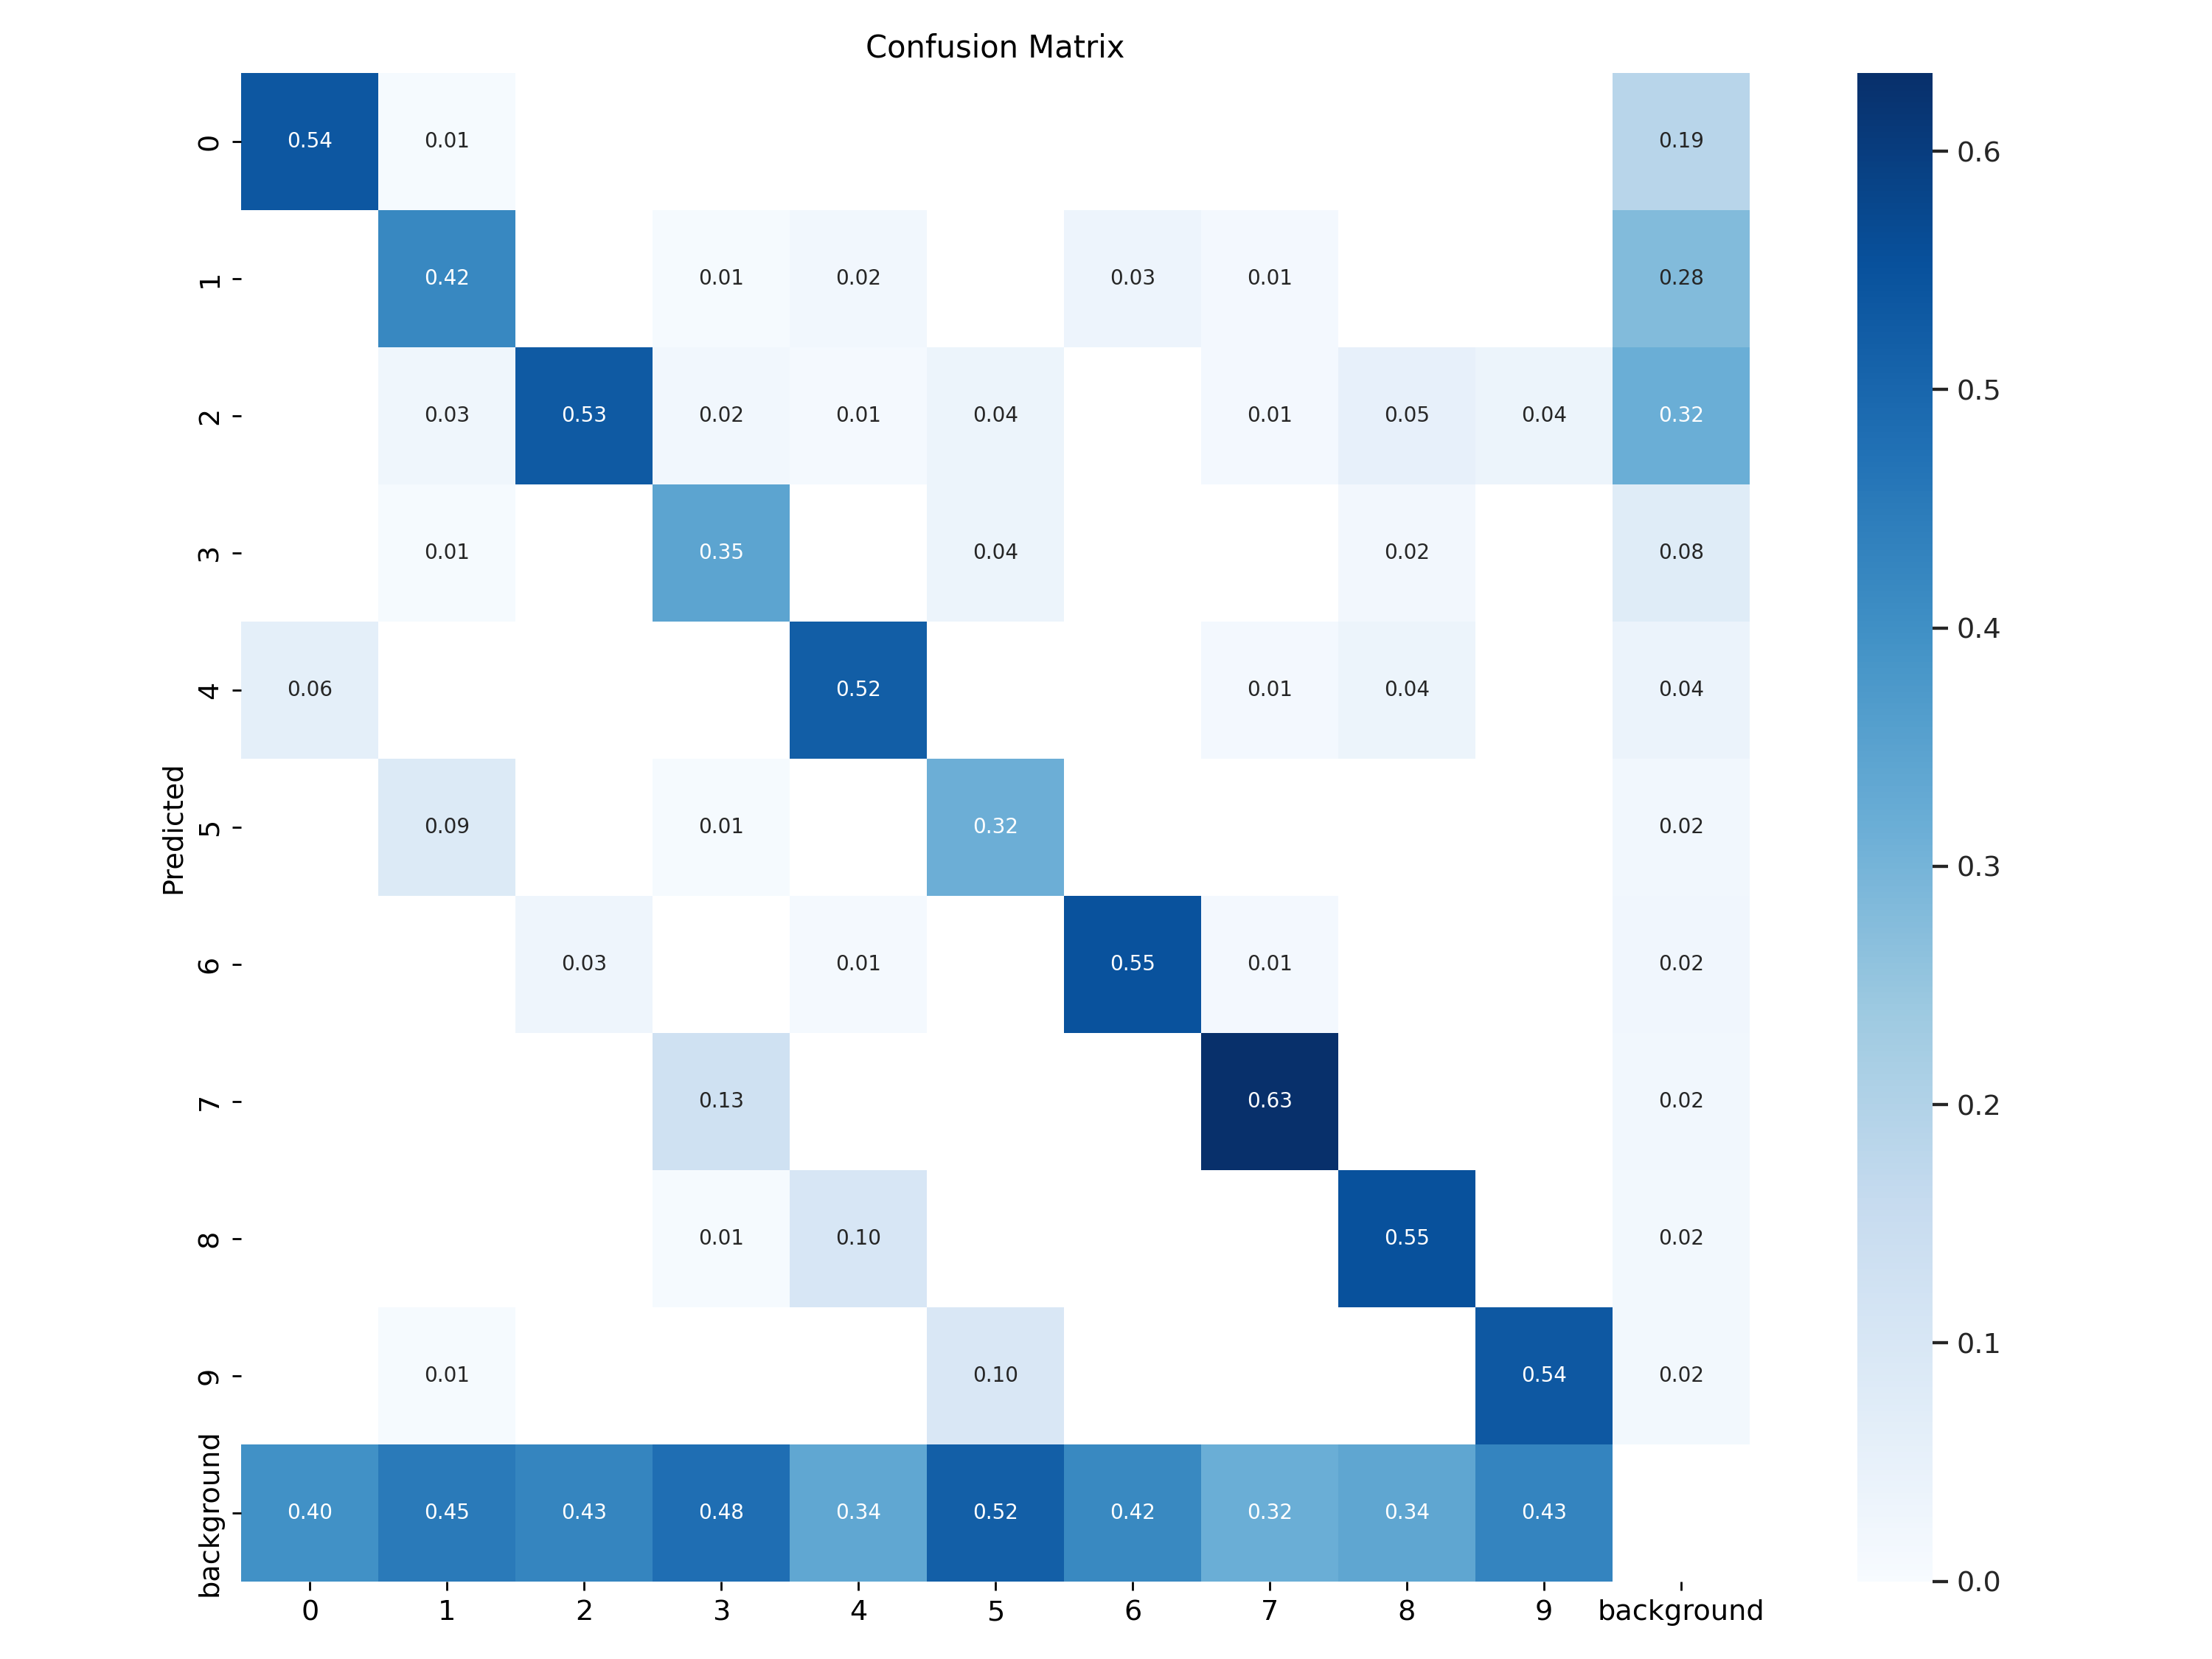

In [ ]:
from IPython.display import Image

Image(filename="/content/drive/MyDrive/Ai_intern/Task_2/yolov9/runs/train/exp/confusion_matrix.png", width=500)

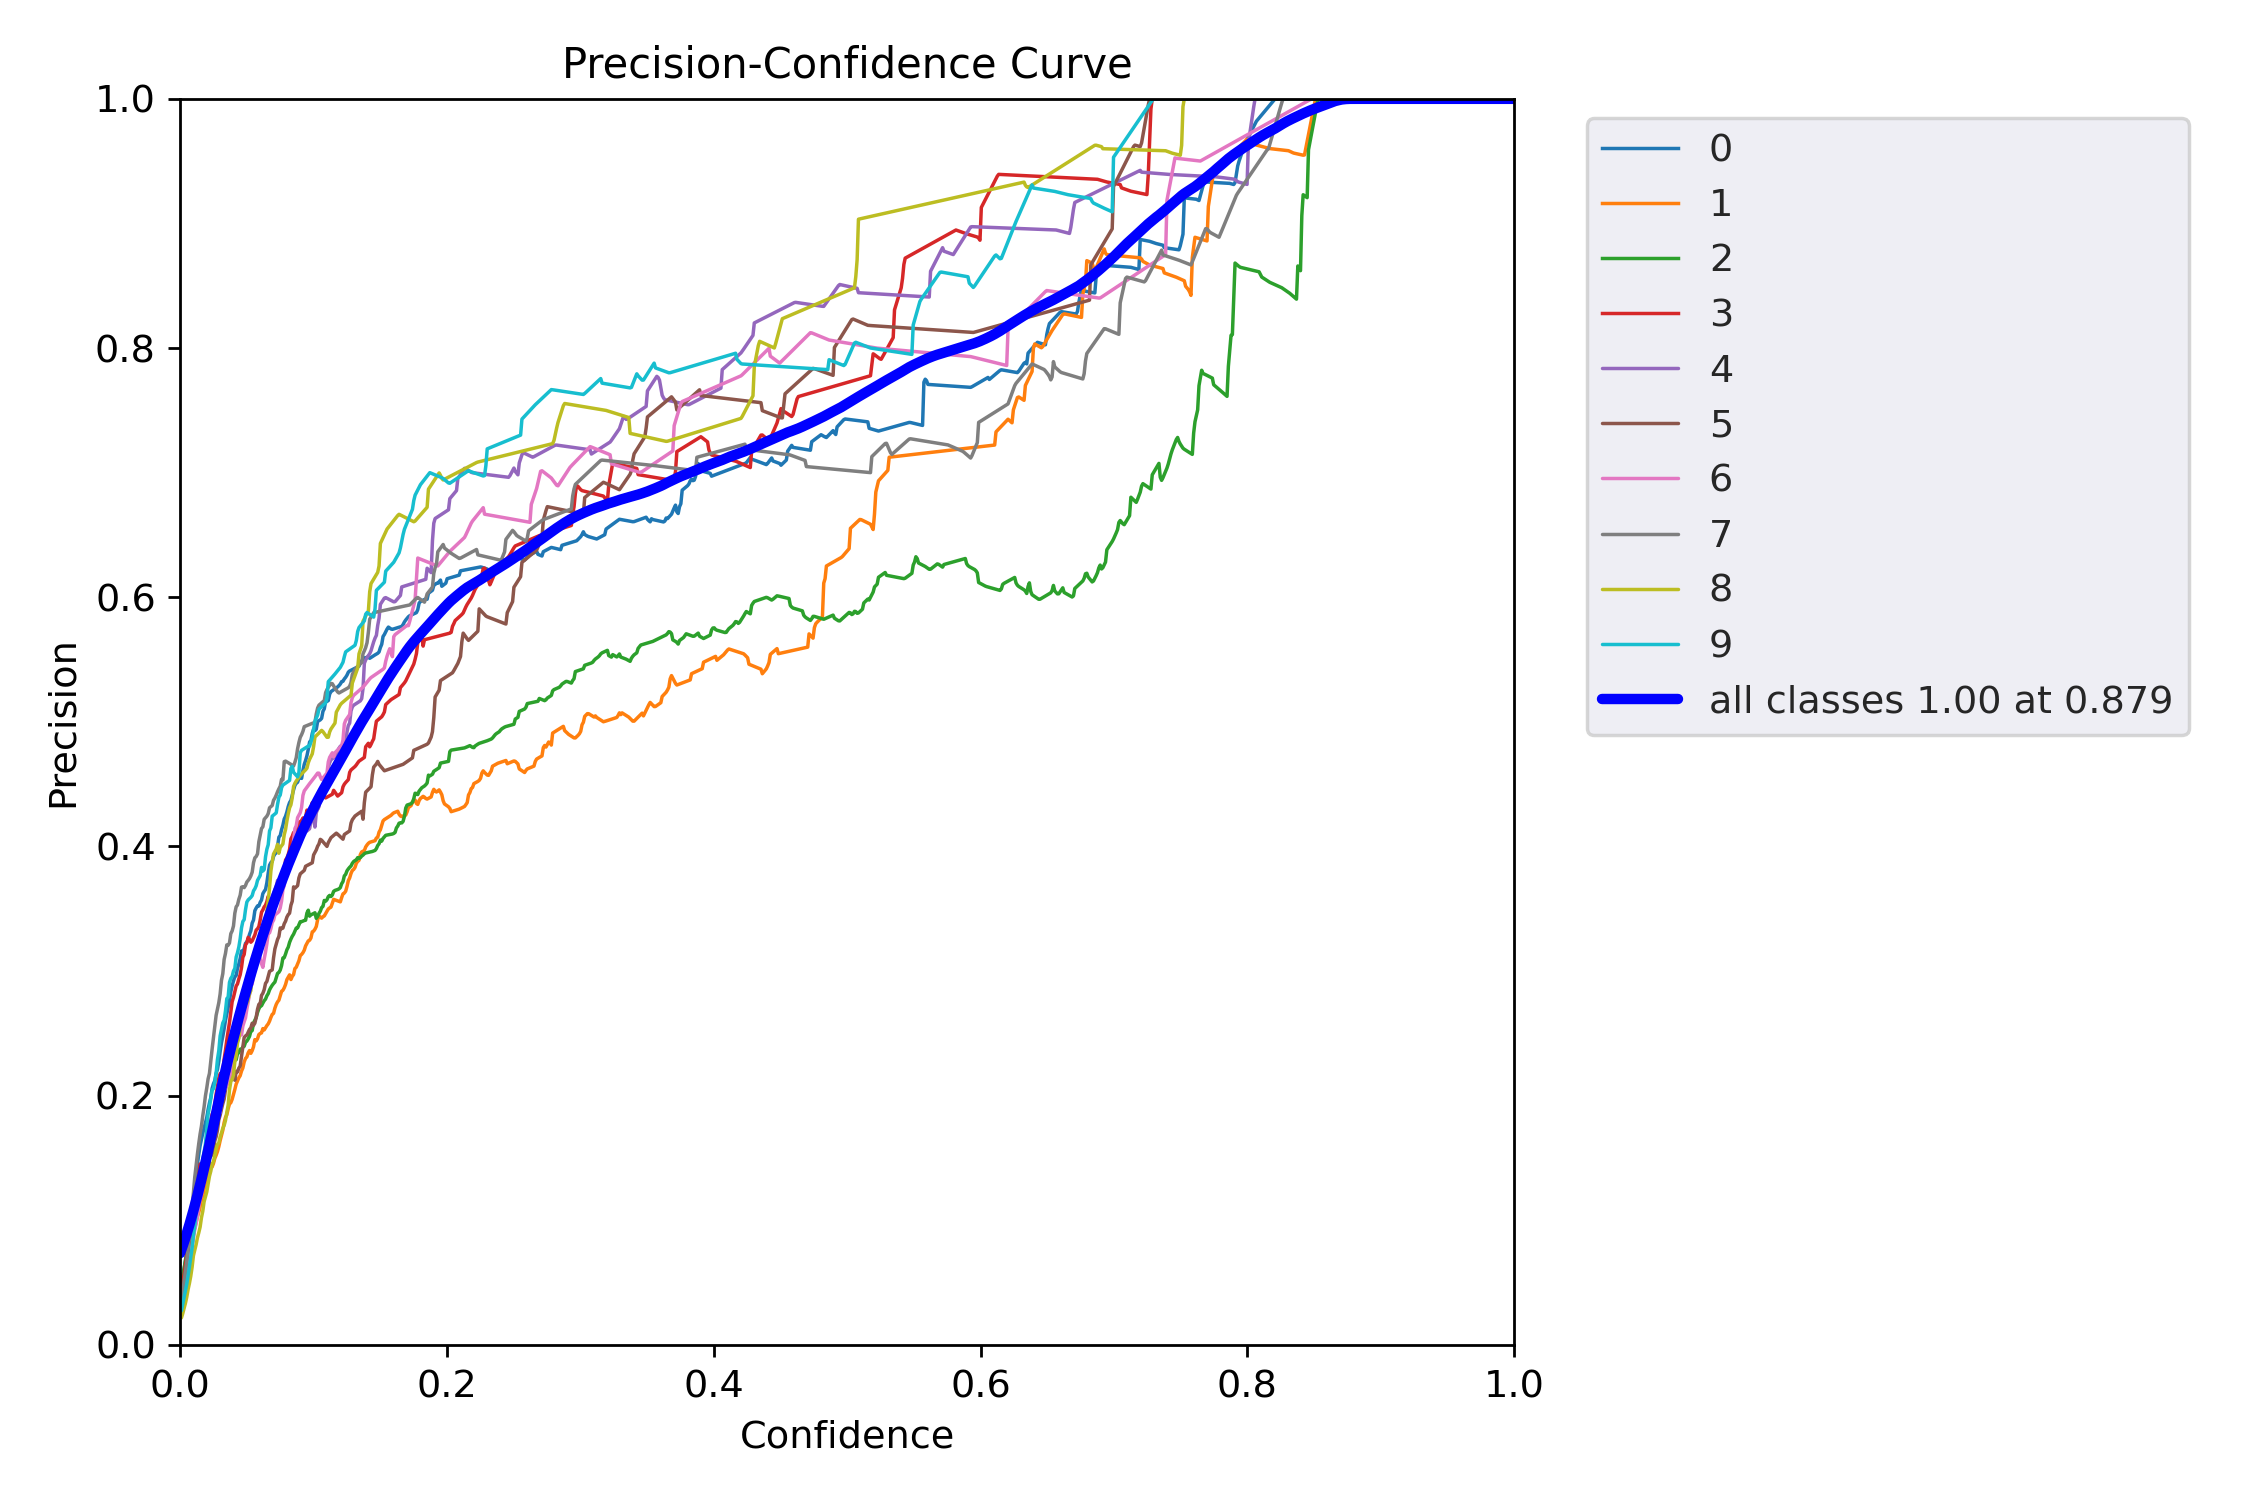

In [4]:
from IPython.display import Image

Image(filename="/content/drive/MyDrive/Ai_intern/Task_2/yolov9/runs/train/exp/P_curve.png", width=1000)

In [3]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights /content/drive/MyDrive/Ai_intern/Task_2/yolov9/runs/train/exp2/weights/best.pt \
--source /content/drive/MyDrive/Ai_intern/Task_2/yolov9/Digits_Dataset/test/images

detect: weights=['/content/drive/MyDrive/Ai_intern/Task_2/yolov9/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/Ai_intern/Task_2/yolov9/Digits_Dataset/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLO requirements "gitpython" "ipython" not found, attempting AutoUpdate...
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)

requirements: 2 packages updated per /content/drive

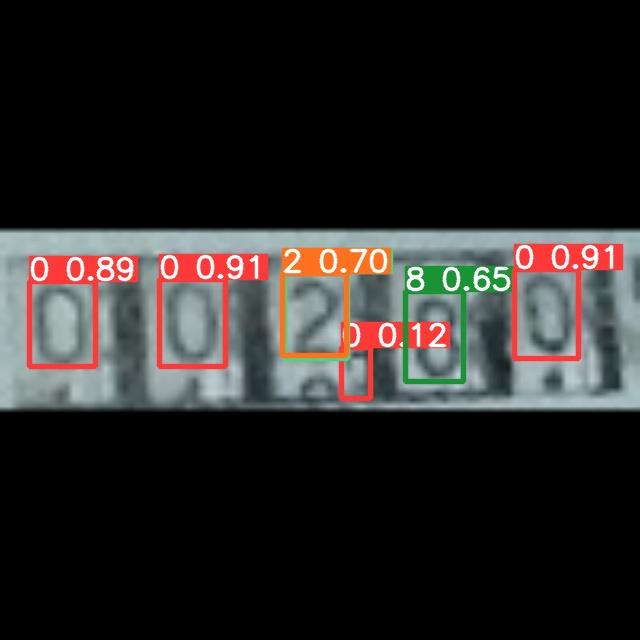

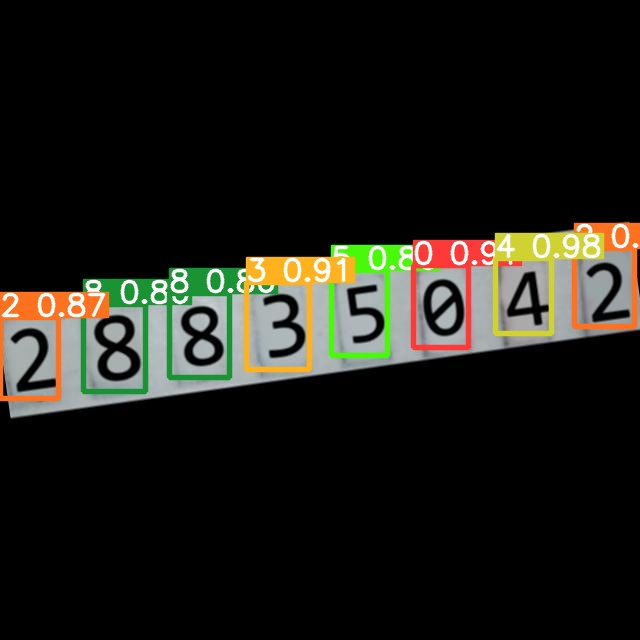

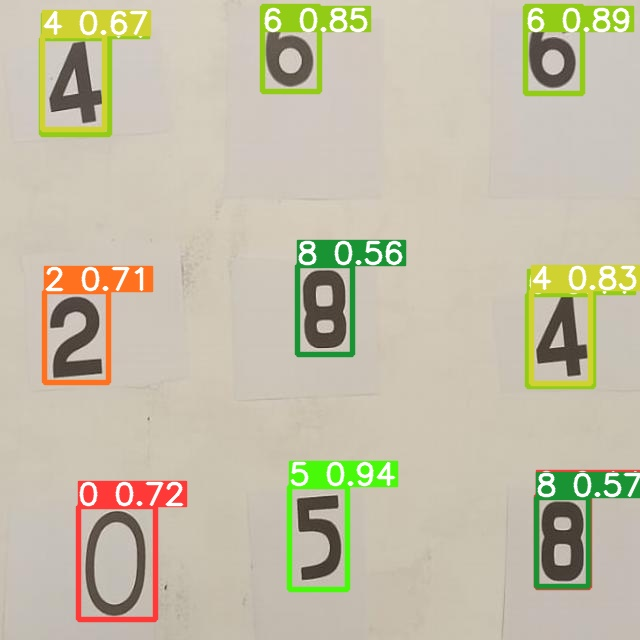

In [8]:

from IPython.display import Image, display

image_paths = [
    "/content/drive/MyDrive/Ai_intern/Task_2/yolov9/runs/detect/exp4/Copy of photo_095949505-jpg_jpg.rf.bd86e6312d8ceb87be7b70b3782e1972.jpg",
    "/content/drive/MyDrive/Ai_intern/Task_2/yolov9/runs/detect/exp2/water006_00_jpg.rf.191a834497ed72d499d5d852a15d5e6d.jpg",
    "/content/drive/MyDrive/Ai_intern/Task_2/yolov9/runs/detect/exp4/102_jpg.rf.77bec73d88b580d821e922bbfeb26e11.jpg"


]

for path in image_paths:
  try:
    display(Image(filename=path, width=700))
  except FileNotFoundError:
    print(f"File not found: {path}")



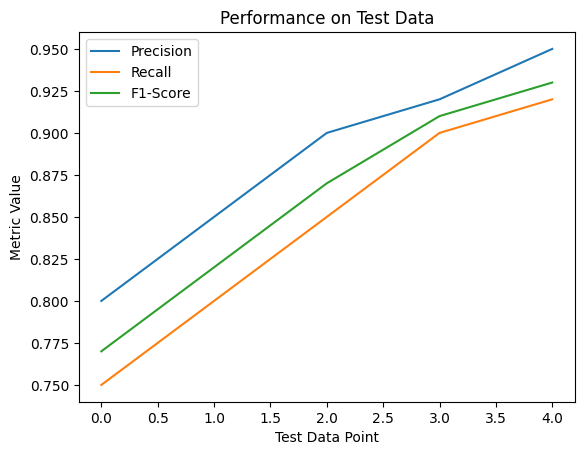

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have lists of precision, recall, and F1-score values
precision = [0.8, 0.85, 0.9, 0.92, 0.95]
recall = [0.75, 0.8, 0.85, 0.9, 0.92]
f1_score = [0.77, 0.82, 0.87, 0.91, 0.93]

# Create a range of values for the x-axis
x_values = np.arange(len(precision))

# Create the plot
plt.plot(x_values, precision, label='Precision')
plt.plot(x_values, recall, label='Recall')
plt.plot(x_values, f1_score, label='F1-Score')

# Add labels and title
plt.xlabel('Test Data Point')
plt.ylabel('Metric Value')
plt.title('Performance on Test Data')

# Add legend
plt.legend()

# Display the plot
plt.show()
